In [1]:
from elasticsearch import Elasticsearch

# 連接 Elasticsearch（無需帳號密碼）
es = Elasticsearch("http://localhost:9200")

# 測試連線
if es.ping():
    print("✅ 成功連接 Elasticsearch")
else:
    print("❌ 連接失敗")


✅ 成功連接 Elasticsearch


In [2]:
index_name = "ig_data"

# 如果索引已經存在，則刪除並重新建立
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)

es.indices.create(index=index_name, body={
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "content": {"type": "text"},
            "creation_timestamp": {"type": "date"}
        }
    }
})

print(f"✅ 索引 '{index_name}' 已建立")


✅ 索引 'ig_data' 已建立


In [3]:
import json
json_file='ig_data.json'

# 假設你的 JSON 檔案名稱為 'account_information.json'
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [4]:
import datetime


for i in data:
    # 要插入的文本資料
    doc={}
    # 讀取data資料
    doc["content"]=i["title"]
    doc["datetime"]=i["creation_timestamp"]
    doc["timestamp"]=datetime.datetime.now()
    doc["media"]=i["media"]

    # 插入文件（Elasticsearch 會自動生成 ID）
    res = es.index(index=index_name, body=doc)
    print(f"✅ 文本已寫入，ID: {res['_id']}")




✅ 文本已寫入，ID: YaBiLJUBGZI-6PgSnOVh
✅ 文本已寫入，ID: YqBiLJUBGZI-6PgSnOWb
✅ 文本已寫入，ID: Y6BiLJUBGZI-6PgSnOWf
✅ 文本已寫入，ID: ZKBiLJUBGZI-6PgSnOWi
✅ 文本已寫入，ID: ZaBiLJUBGZI-6PgSnOWl
✅ 文本已寫入，ID: ZqBiLJUBGZI-6PgSnOWn
✅ 文本已寫入，ID: Z6BiLJUBGZI-6PgSnOXC
✅ 文本已寫入，ID: aKBiLJUBGZI-6PgSnOXF
✅ 文本已寫入，ID: aaBiLJUBGZI-6PgSnOXI
✅ 文本已寫入，ID: aqBiLJUBGZI-6PgSnOXK
✅ 文本已寫入，ID: a6BiLJUBGZI-6PgSnOXM
✅ 文本已寫入，ID: bKBiLJUBGZI-6PgSnOXO
✅ 文本已寫入，ID: baBiLJUBGZI-6PgSnOXQ
✅ 文本已寫入，ID: bqBiLJUBGZI-6PgSnOXS
✅ 文本已寫入，ID: b6BiLJUBGZI-6PgSnOXU
✅ 文本已寫入，ID: cKBiLJUBGZI-6PgSnOXW
✅ 文本已寫入，ID: caBiLJUBGZI-6PgSnOXY
✅ 文本已寫入，ID: cqBiLJUBGZI-6PgSnOXa
✅ 文本已寫入，ID: c6BiLJUBGZI-6PgSnOXc
✅ 文本已寫入，ID: dKBiLJUBGZI-6PgSnOXe
✅ 文本已寫入，ID: daBiLJUBGZI-6PgSnOXg
✅ 文本已寫入，ID: dqBiLJUBGZI-6PgSnOXj
✅ 文本已寫入，ID: d6BiLJUBGZI-6PgSnOXl
✅ 文本已寫入，ID: eKBiLJUBGZI-6PgSnOXn
✅ 文本已寫入，ID: eaBiLJUBGZI-6PgSnOXp
✅ 文本已寫入，ID: eqBiLJUBGZI-6PgSnOXq
✅ 文本已寫入，ID: e6BiLJUBGZI-6PgSnOXs
✅ 文本已寫入，ID: fKBiLJUBGZI-6PgSnOXu
✅ 文本已寫入，ID: faBiLJUBGZI-6PgSnOXw
✅ 文本已寫入，ID: fqBiLJUBGZI-6PgSnOXy
✅ 文本已寫入，ID

In [ ]:
# es.indices.delete(index=index_name)
# print(f"🗑️ 索引 '{index_name}' 已刪除")


🗑️ 索引 'ig_data' 已刪除


In [5]:
query = {
    "query": {
        "match": {
            "content": "麵"
        }
    }
}

response = es.search(index=index_name, body=query)

for hit in response["hits"]["hits"]:
    print(hit['_id'])

# print(response["hits"]["hits"])

# print("🔍 搜索結果：")
# for hit in response["hits"]["hits"]:
#     print(f"📄 {hit['_source']['content']} (ID: {hit['_id']})")


_aBiLJUBGZI-6PgSoedl
F6BiLJUBGZI-6PgSn-fF
qaBiLJUBGZI-6PgSn-YR
IaBiLJUBGZI-6PgSnuYI
HaBiLJUBGZI-6PgSnuYC
AKBiLJUBGZI-6PgSn-ej
4aBiLJUBGZI-6PgSneWl
zqBiLJUBGZI-6PgSn-ZT
56BiLJUBGZI-6PgSn-Z9
tqBiLJUBGZI-6PgSneVa


In [6]:
post=response["hits"]["hits"][0]
print(post['_id'])
print(post['_source']['content'])
print(post['_source']['datetime'])
for i in post['_source']['media']:
    print(i['uri'])

_aBiLJUBGZI-6PgSoedl
🚩台北內湖
拉麵還是內用最好吃😋
柚香拉麵酸甜清爽
咖喱拉麵濃郁渾厚
吃完身心靈滿足～～～
價格：
柚香叉燒拉麵120
咖喱叉燒拉麵180
2021-08-16T00:30:39
media/posts/202108/236651352_247873327186457_7381910403274127878_n_17979810082401262.jpg
media/posts/202108/236463251_646383776336170_2212110138996666204_n_17901731651157121.jpg
media/posts/202108/238486062_1059323688134669_2760373052395147696_n_17911562848975539.jpg


In [8]:
# 讀取圖片路徑，存進清單（先確認 'media' 欄位存在且不為空）
image_list = []
media = post["_source"].get('media', [])
if media:
    for item in media:
        # 假設每個 item 內有 'uri' 欄位
        image_path = '../' + item.get('uri', '')
        image_list.append(image_path)

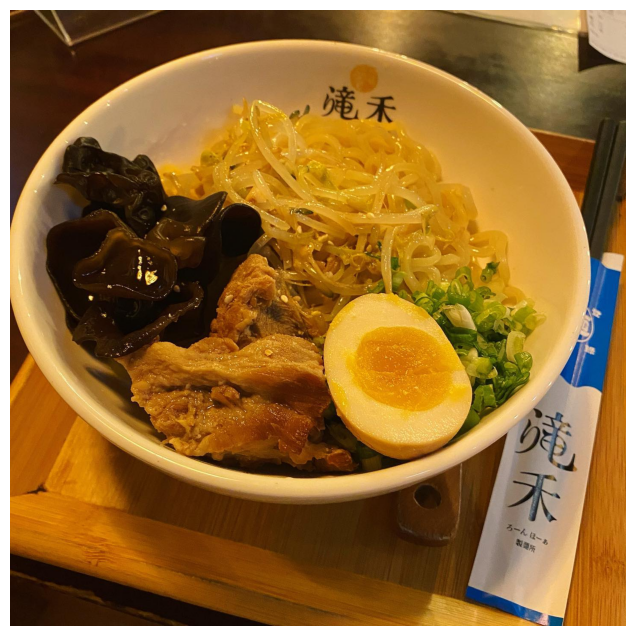

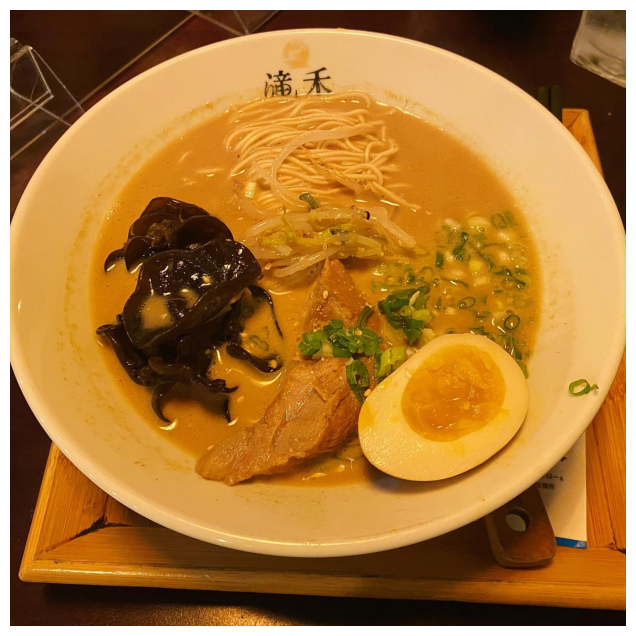

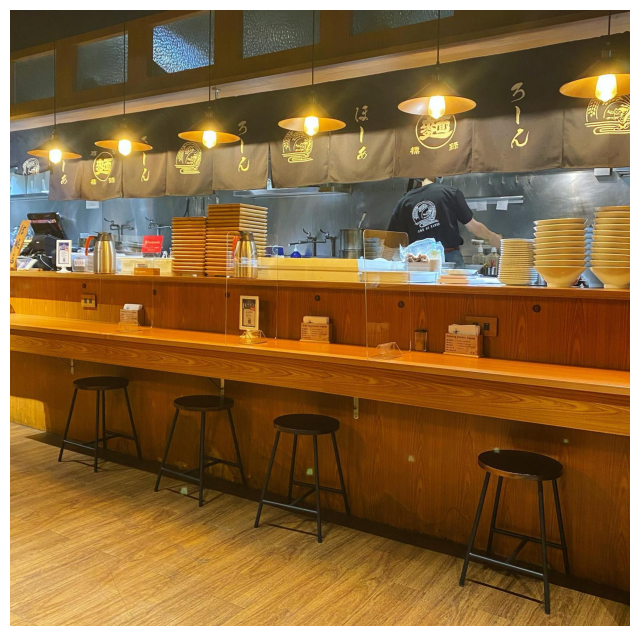

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in image_list:

    # 讀取影像檔案
    img = mpimg.imread(i)

    # 設定圖片大小
    plt.figure(figsize=(10, 8))

    # 顯示圖片
    plt.imshow(img)
    plt.axis('off')  # 關閉座標軸
    plt.show()